In [10]:
#from osgeo import gdal, gdal_array

import matplotlib.pyplot as plt

import matplotlib.patches as patches # Needed to draw rectangles
from matplotlib import animation, rc
from IPython.display import HTML
# Turn on inline presentations
%matplotlib inline

import os
from pathlib import Path
import sys
import glob
import subprocess
import shlex
import time
import numpy as np
from datetime import datetime
from datetime import timedelta
inputfile = sys.argv[1]
import os.path
from os import path
from matplotlib import animation, rc
import pandas as pd
gdal.UseExceptions()
gdal.AllRegister()
import rasterio


ImportError: DLL load failed: Den angitte prosedyren ble ikke funnet.

In [9]:
pip install --global-option=build_ext --global-option="-I/usr/include/gdal" GDAL==`gdal-config --version`    

Note: you may need to restart the kernel to use updated packages.



Usage:   
  C:\Users\vaak\Anaconda3\envs\myenv\python.exe -m pip install [options] <requirement specifier> [package-index-options] ...
  C:\Users\vaak\Anaconda3\envs\myenv\python.exe -m pip install [options] -r <requirements file> [package-index-options] ...
  C:\Users\vaak\Anaconda3\envs\myenv\python.exe -m pip install [options] [-e] <vcs project url> ...
  C:\Users\vaak\Anaconda3\envs\myenv\python.exe -m pip install [options] [-e] <local project path> ...
  C:\Users\vaak\Anaconda3\envs\myenv\python.exe -m pip install [options] <archive url/path> ...

no such option: --version`


In [6]:
# Import Python 3's print function and division
from __future__ import print_function, division

# Import GDAL, NumPy, and matplotlib
#from osgeo import gdal, gdal_array
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import *
import os 
# Tell GDAL to throw Python exceptions, and register all drivers
#gdal.UseExceptions()
#gdal.AllRegister()
# http://patrickgray.me/open-geo-tutorial/chapter_5_classification.html

In [7]:
# next setup a colormap for our map
colors = dict((
    (0, (48, 156, 214, 255)),   # Blue - Water
    (1, (139,69,19, 255)),      # Brown - WetSand
    (2, (96, 19, 134, 255)),    # Purple - Emergent Wetland
    (3, (244, 164, 96, 255)),   # Tan - Sand
    (4, (206, 224, 196, 255)),  # Lime - Herbaceous
    (5, (34, 139, 34, 255)),    # Forest Green - Forest 
))

n=5
# Put 0 - 255 as float 0 - 1
for k in colors:
    v = colors[k]
    _v = [_v / 255.0 for _v in v]
    colors[k] = _v
    
index_colors = [colors[key] if key in colors else 
                (255, 255, 255, 0) for key in range(0, n+1)]

cmap = plt.matplotlib.colors.ListedColormap(index_colors, 'Classification', n+1)

In [8]:
def dualpol2rgb(like,cross,sartype='amp',ndv=0):
    CF=np.power(10.,-8.3)
    if np.isnan(ndv):
        mask=np.isnana(cross)
    else:
        mask=np.equal(cross,ndv)
        
    l = np.ma.array(like,mask=mask,dtype=np.float32)
    c = np.ma.array(cross,mask=mask,dtype=np.float32)
    if sartype=='amp':
        l=np.ma.power(l,2.)*CF
        c=np.ma.power(l,2.)*CF
    elif sartype=='dB':
        l=np.ma.power(10.,l/10.)
        c=np.ma.power(10.,c/10.)
    elif sartype=='pwr':
        pass
    else:
        print('invalid type ',sartype)
        raise RuntimeError
    
    if sartype=='amp':
        ratio=np.ma.sqrt(l/c)/10
        ratio[np.isinf(ratio.data)]=0.00001
    elif sartype=='dB':
        ratio=10.*np.ma.log10(l/c)
    else:
        ratio=l/c
        
    ratio=ratio.filled(ndv)
    rgb=np.dstack((like,cross,ratio.data))
    bandnames=('Like','Cross','Ratio')
    return rgb,bandnames,sartype

def any2amp(raster,sartype='amp',ndv=0):
    CF=np.power(10.,-8.3)
    mask=raster==ndv
    if sartype=='pwr':
        raster=np.sqrt(raster/CF)
    elif sartype=='dB':
        raster=np.ma.power(10.,(raster+83)/20.)
    elif sartype=='amp':
        pass
    else:
        print('invalid type ',sartype)
        raise RuntimeError
        
    raster[raster<1]=1
    raster[raster>65535]=65535
    raster[mask]=0
    raster=np.ndarray.astype(raster,dtype=np.uint16)
    return raster

In [10]:
datafolder=r'C:\Users\vaak\Desktop\UoS\weedwatch project\S1_Vembanad\STK'
os.chdir(datafolder)
os.getcwd()
#files=glob.glob('*2019*.tif') 

'C:\\Users\\vaak\\Desktop\\UoS\\weedwatch project\\S1_Vembanad\\STK'

In [58]:
    
!gdalwarp -overwrite -tr 20 20 -tap -te 644906 1047915 660387 1072175 -t_srs EPSG:32643 Stack_sigma0_20191001_20100430.tif  Stack_sigma0_20191001_20100430_aoi.tif

!gdalbuildvrt  -tr 20 20 Stack_sigma0_20191001_20100430_Vembanadlake.vrt Stack_sigma0_20191001_20100430_aoi.tif

0...10...20...30...40...50...60...70...80...90...100 - done.


Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
ERROR 1: Deleting Stack_sigma0_20191001_20100430_aoi.tif failed:
Permission denied


0...10...20...30...40...50...60...70...80...90...100 - done.


In [59]:
aoifolder='S:\Prosjekter\Landsskog\Vahid\India\SHP'
os.chdir(aoifolder)
os.getcwd()
#!gdalwarp -overwrite -tr 20 20 -tap -te 658292 5855966 692192 5887446 -t_srs EPSG:32629 Harvest_Units.tif  Harvest_Units_AOI.tif

!gdal_rasterize  -burn 1 -ot Float32 -of GTiff  -te 644906 1047915 660387 1072175 -tr 20 20 -tap   -l POLYGON_utm POLYGON_utm.shp POLYGON_aoi.tif

   

0...10...20...30...40...50...60...70...80...90...100 - done.


ERROR 1: Deleting POLYGON_aoi.tif failed:
Permission denied


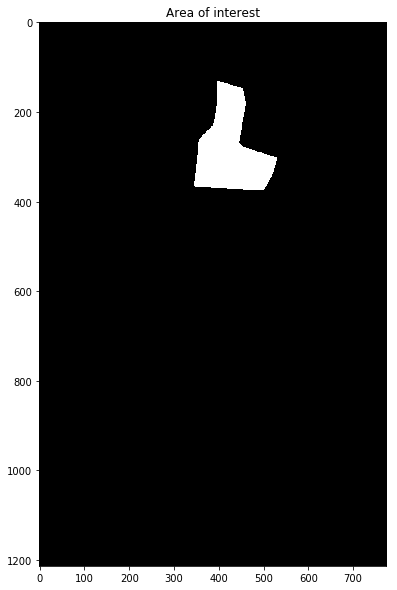

In [60]:
 
GTfile='POLYGON_aoi.tif'
      
    
gt_ds = gdal.Open(GTfile, gdal.GA_ReadOnly)
GT = gt_ds.GetRasterBand(1).ReadAsArray().astype(np.uint8)
proj=gt_ds.GetProjection()
geotrans=list(gt_ds .GetGeoTransform())


maskcv=~GT
plt.figure(figsize=(10,10))
plt.imshow(GT,cmap='gray')
_=plt.title('Area of interest')

In [61]:
os.chdir(datafolder)
os.getcwd()

'S:\\Prosjekter\\Landsskog\\Vahid\\India\\STK'

In [6]:
outputGEOfolder=r'C:\Users\vaak\Desktop\UoS\weedwatch project\S1_Vembanad\GeoMLC'

k=0
dates=[]
for tiffile in sorted(os.listdir(outputGEOfolder)):
    k=k+1
    outputname=tiffile[7:15]
    dates.append(outputname)
tindex=pd.DatetimeIndex(dates)
tindex   

DatetimeIndex(['2019-10-09', '2019-10-21', '2019-10-27', '2019-11-02',
               '2019-11-08', '2019-11-14', '2019-11-20', '2019-11-26',
               '2019-12-02', '2019-12-08', '2019-12-14', '2019-12-20',
               '2019-12-26', '2020-01-01', '2020-01-07', '2020-01-13',
               '2020-01-19', '2020-01-31', '2020-02-12', '2020-02-24',
               '2020-03-07', '2020-03-19', '2020-03-31', '2020-04-12',
               '2020-04-24'],
              dtype='datetime64[ns]', freq=None)

In [3]:
# Open the image and read the first raster band
imagefile='Stack_sigma0_20191001_20100430_Vembanadlake.vrt'
subset=None
raster_vrt = rasterio.open(imagefile)





NameError: name 'rasterio' is not defined

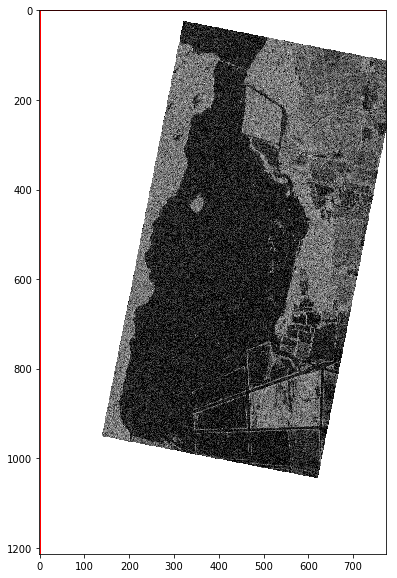

In [64]:
# Plot one band and subset outline to see which subset we are interested in
raster=band.ReadAsArray()
vmin=np.percentile(raster.flatten(),5)
vmax=np.percentile(raster.flatten(),95)
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
ax.imshow(raster,cmap='gray',vmin=vmin,vmax=vmax)
# plot the subset as rectangle
_=ax.add_patch(patches.Rectangle((subset[0],subset[1]),subset[2],subset[3],
 fill=False,edgecolor='red'))

In [65]:
subset=[]
raster0 = band.ReadAsArray(*subset)
bandnbr=0 # Needed for updates
rasterstack=img.ReadAsArray(*subset)

rasterstack_vv=rasterstack[:rasterstack.shape[0]-1:2,:,:]
rasterstack_vh=rasterstack[1:rasterstack.shape[0]:2,:,:]

In [66]:
rasterstack_vv.shape, rasterstack_vh.shape,rasterstack.shape

((25L, 1214L, 775L), (25L, 1214L, 775L), (50L, 1214L, 775L))

In [67]:
#These will select the two bands
raster_1 = rasterstack_vv[1,:,:]
raster_2 = rasterstack_vv[17,:,:]

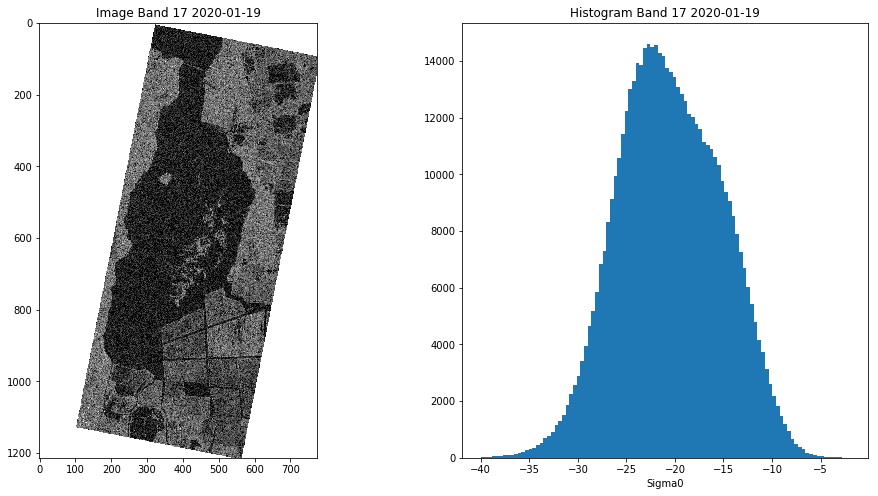

In [68]:
fig = plt.figure(figsize=(16,8)) # Initialize figure with a size
ax1 = fig.add_subplot(121) # 121 determines: 1 row, 2 plots, first plot
ax2 = fig.add_subplot(122) # 122 determines: 1 row, 2 plots, second plot
# First plot: Image
bandnbr=17
raster_1 = rasterstack_vv[bandnbr,:,:]
vmin=np.percentile(raster_1.flatten(),5)
vmax=np.percentile(raster_1.flatten(),95)
ax1.imshow(raster_1,cmap='gray',vmin=vmin,vmax=vmax)
ax1.set_title('Image Band {} {}'.format(bandnbr,
tindex[bandnbr-1].date()))
# Second plot: Historgram
# IMPORTANT: To get a histogram, we first need to *flatten*
# the two-dimensional image into a one-dimensional vector.
h = ax2.hist(raster_1.flatten(),bins=100,range=(-40,-2))
ax2.xaxis.set_label_text('Sigma0')
_=ax2.set_title('Histogram Band {} {}'.format(bandnbr,
tindex[bandnbr-1].date()))

In [69]:
def showImage(raster,tindex,bandnbr,vmin=None,vmax=None):
    fig = plt.figure(figsize=(16,8))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    ax1.imshow(raster,cmap='gray',vmin=vmin,vmax=vmax)
    ax1.set_title('Image Band {} {}'.format(bandnbr,
    tindex[bandnbr-1].date()))
    vmin=np.percentile(raster,2) if vmin==None else vmin #change vmin & vmax to
    #change what values are displayed
    vmax=np.percentile(raster,98) if vmax==None else vmax
    ax1.xaxis.set_label_text(
    'Linear stretch Min={} Max={}'.format(vmin,vmax))
    h = ax2.hist(raster.flatten(),bins=100,range=(vmin,vmax))
    ax2.xaxis.set_label_text('Sigma0')
    ax2.set_title('Histogram Band {} {}'.format(bandnbr,
    tindex[bandnbr-1].date()))

In [110]:
def showImagehist(rasterstack,subset,tindex,bandnbr,vmin=None,vmax=None):
    fig = plt.figure(figsize=(16,8))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    ax1.imshow(rasterstack[bandnbr-1,:,:],cmap='gray',vmin=vmin,vmax=vmax)
    #ax1.imshow(raster,cmap='gray',vmin=vmin,vmax=vmax)
    ax1.set_title('Image Band {} {}'.format(bandnbr,
    tindex[bandnbr-1].date()))
    vmin=np.percentile(rasterstack,2) if vmin==None else vmin #change vmin & vmax to
    #change what values are displayed
    vmax=np.percentile(rasterstack,98) if vmax==None else vmax
    ax1.xaxis.set_label_text('Linear stretch Min={} Max={}'.format(vmin,vmax))
    raster_subset=rasterstack[bandnbr-1,subset[1]:subset[1]+subset[3],subset[0]:subset[0]+subset[2]]
    ax1.add_patch(patches.Rectangle((subset[0],subset[1]),subset[2],subset[3],fill=False,edgecolor='red'))
    ax1.xaxis.set_label_text('Pixel')
    ax1.yaxis.set_label_text('Line')
    h = ax2.hist(raster_subset.flatten(),bins=100,range=(vmin,vmax))
    ax2.xaxis.set_label_text('Sigma0')
    ax2.set_title('Histogram Band {} {}'.format(bandnbr,
    tindex[bandnbr-1].date()))

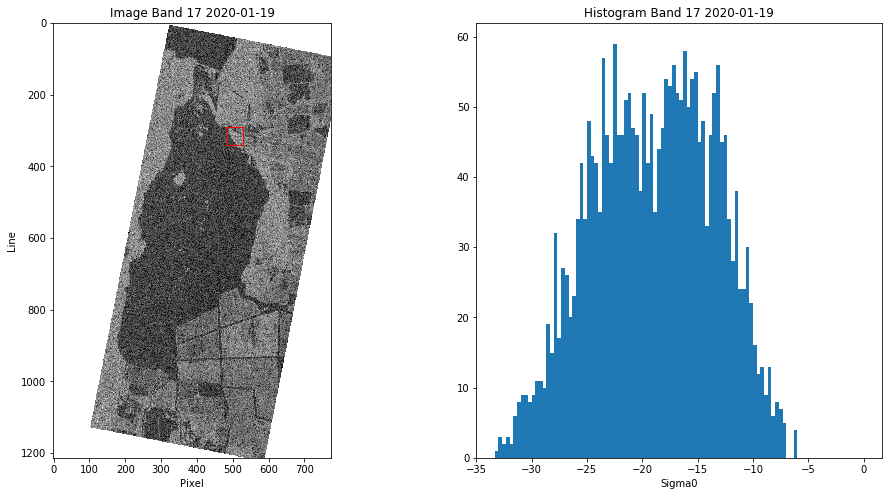

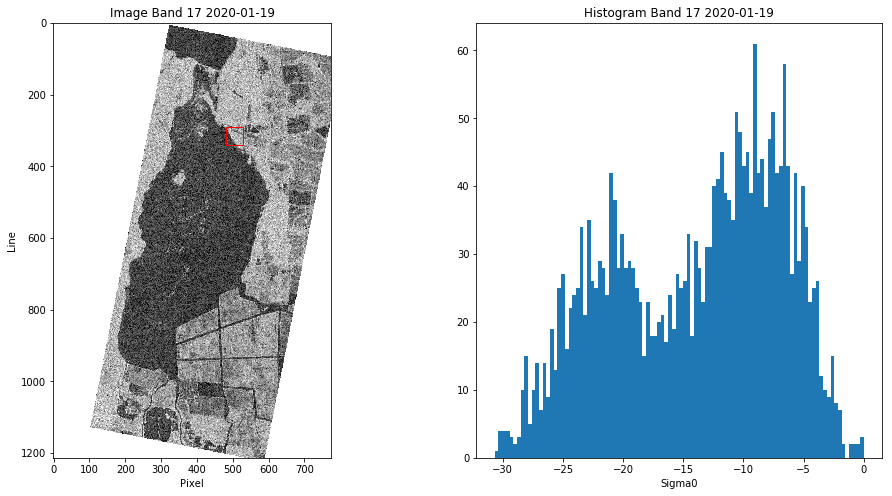

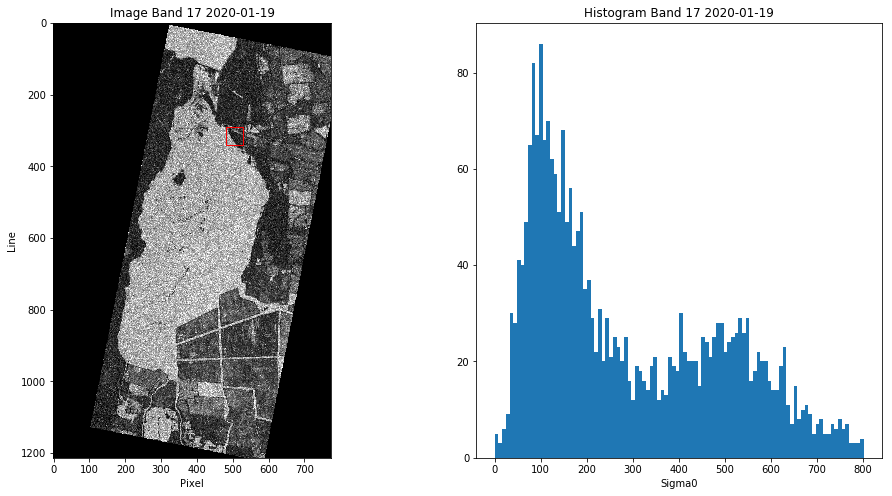

In [72]:
# ENTER YOUR CODE HERE
subset=[480,290,50,50]
bandnbr=17
vmin=np.percentile(rasterstack_vv.flatten(),0.5)
vmax=np.percentile(rasterstack_vv.flatten(),95)
showImagehist(rasterstack_vv,subset,tindex,bandnbr,vmin,vmax)
vmin=np.percentile(rasterstack_vh.flatten(),0.5)
vmax=np.percentile(rasterstack_vh.flatten(),95)
showImagehist(rasterstack_vh,subset,tindex,bandnbr,vmin,vmax)
productvvvh=rasterstack_vv*rasterstack_vh
vmin=np.percentile(depolratio.flatten(),0.5)
vmax=np.percentile(depolratio.flatten(),99)
showImagehist(depolratio,subset,tindex,bandnbr,vmin,vmax)


In [73]:
bandnbr=21
tindex[bandnbr-1]

Timestamp('2020-03-07 00:00:00')

In [74]:
def animate(i):
    ax.set_title("{}".format(tindex[i].date()))
    im.set_data(rasterstack[i])

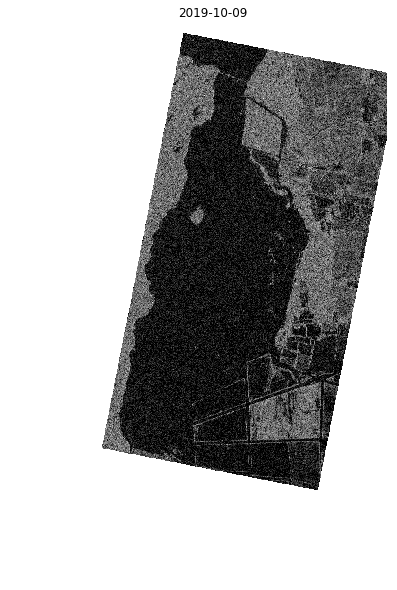

In [75]:
#capture
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
fig=plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.axis('off')
vmin=np.percentile(rasterstack.flatten(),5)
vmax=np.percentile(rasterstack.flatten(),95)
im = ax.imshow(raster0,cmap='gray',vmin=vmin,vmax=vmax)
ax.set_title("{}".format(tindex[0].date()))

# Interval is given in milliseconds
ani = matplotlib.animation.FuncAnimation(fig, animate,
 frames=rasterstack.shape[0],
 interval=400)

In [76]:
rs_means_vv = np.mean(rasterstack_vv,axis=(1,2))
rs_means_vh = np.mean(rasterstack_vh,axis=(1,2))


for kk in range(1,rasterstack_vv.shape[0]): 
    rs_means_vv[kk]=np.mean(rasterstack_vv[kk,GT>0]) #mean of repeat-pass coherence over ground-truth pixels
for kk in range(1,rasterstack_vh.shape[0]): 
    rs_means_vh[kk]=np.mean(rasterstack_vh[kk,GT>0]) #mean of repeat-pass coherence over ground-truth pixels

In [77]:
rs_means_vh

array([ -8.392048, -13.766225, -21.642893, -23.821598, -21.756437,
       -22.00719 , -21.539186, -21.96106 , -20.218033, -22.99169 ,
       -20.574644, -22.619297, -20.714857, -21.524645, -21.561014,
       -22.46182 , -19.44616 , -21.51595 , -22.598358, -22.18812 ,
       -21.949274, -21.296158, -21.81029 , -23.2558  , -21.772476],
      dtype=float32)

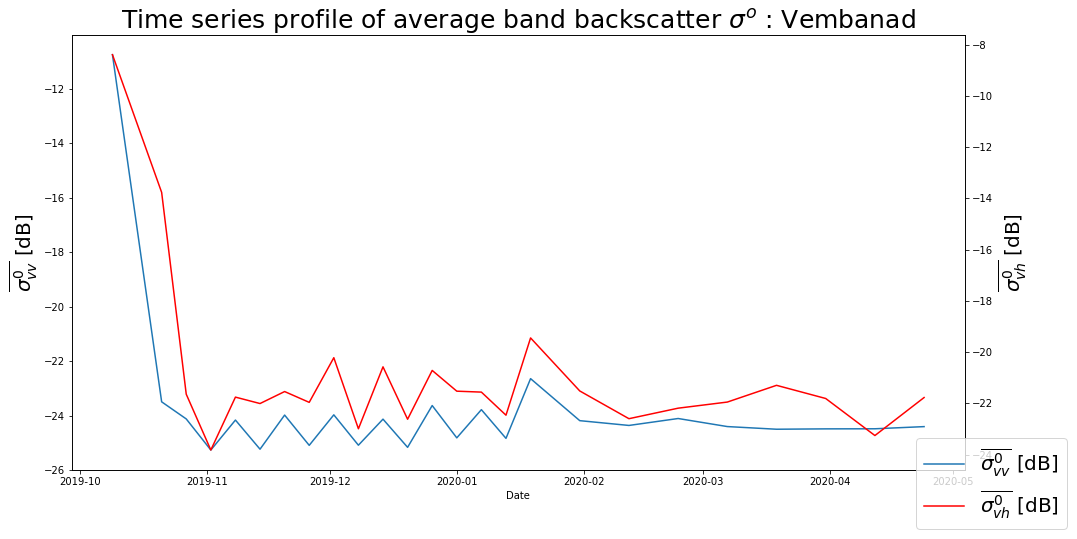

In [78]:
fig = plt.figure(figsize=(16,8))
ax1=fig.add_subplot(111)
ax1.plot(tindex,rs_means_vv)
ax1.set_xlabel('Date')
ax1.set_ylabel('$\overline{\sigma^0_{vv}}$ [dB]',fontsize=20)

ax2=ax1.twinx()
ax2.plot(tindex,rs_means_vh,color='red')
plt.title('Time series profile of average band backscatter $\sigma^o$ : Vembanad',fontsize=25)
ax2.set_ylabel('$\overline{\sigma^0_{vh}}$ [dB]',fontsize=20)
fig.legend(['$\overline{\sigma^0_{vv}}$ [dB]','$\overline{\sigma^0_{vh}}$ [dB]'],loc='lower right',fontsize=20)

In [79]:
a =pd.Series(rs_means_vh,index=tindex)

In [80]:
a

2019-10-09    -8.392048
2019-10-21   -13.766225
2019-10-27   -21.642893
2019-11-02   -23.821598
2019-11-08   -21.756437
2019-11-14   -22.007191
2019-11-20   -21.539186
2019-11-26   -21.961060
2019-12-02   -20.218033
2019-12-08   -22.991690
2019-12-14   -20.574644
2019-12-20   -22.619297
2019-12-26   -20.714857
2020-01-01   -21.524645
2020-01-07   -21.561014
2020-01-13   -22.461821
2020-01-19   -19.446159
2020-01-31   -21.515949
2020-02-12   -22.598358
2020-02-24   -22.188120
2020-03-07   -21.949274
2020-03-19   -21.296158
2020-03-31   -21.810289
2020-04-12   -23.255800
2020-04-24   -21.772476
dtype: float32

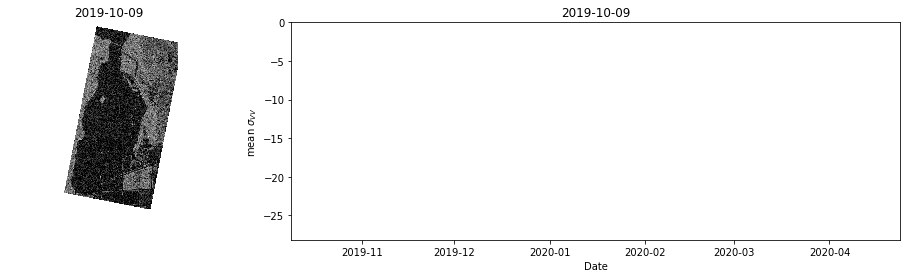

In [81]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,4),gridspec_kw = {'width_ratios':[1, 3]})
vmin=np.percentile(rasterstack_vv.flatten(),5)
vmax=np.percentile(rasterstack_vv.flatten(),95)
im = ax1.imshow(raster0,cmap='gray',vmin=vmin,vmax=vmax)
ax1.set_title("{}".format(tindex[0].date()))
ax1.set_axis_off()

ax2.axis([tindex[0],tindex[-1],rs_means_vv.min(),rs_means_vv.max()])
ax2.set_ylabel('mean $\sigma_{VV}$')
ax2.set_xlabel('Date')
ax2.set_ylim(vmin,vmax)
l, = ax2.plot([],[])

def animate(i):
    ax1.set_title("{}".format(tindex[i].date()))
    im.set_data(rasterstack[i])
    ax2.set_title("{}".format(tindex[i].date()))
    l.set_data(tindex[:(i+1)],rs_means_vv[:(i+1)])
    
#Interval is given in milliseconds
ani = matplotlib.animation.FuncAnimation(fig, animate,
frames=rasterstack_vh.shape[0],interval=200)

In [82]:
def animate(i):
    ax1.set_title("{}".format(tindex[i].date()))
    im.set_data(rasterstack[i])
    ax2.set_title("{}".format(tindex[i].date()))
    l.set_data(tindex[:(i+1)],rs_means_vv[:(i+1)])

In [83]:
from IPython.display import HTML
HTML(ani.to_jshtml())

In [84]:
def timeseries_metrics(raster,ndv=0):
    # Make us of numpy nan functions
    # Check if type is a float array
    if not raster.dtype.name.find('float')>-1:
        raster=raster.astype(np.float32)
    # Set ndv to nan
    if ndv != np.nan:
        raster[np.equal(raster,ndv)]=np.nan
        # Build dictionary of the metrics
        tsmetrics={}
        rperc = np.nanpercentile(raster,[5,50,95],axis=0)
        tsmetrics['mean']=np.nanmean(raster,axis=0)
        tsmetrics['max']=np.nanmax(raster,axis=0)
        tsmetrics['min']=np.nanmin(raster,axis=0)
        tsmetrics['range']=tsmetrics['max']-tsmetrics['min']
        tsmetrics['median']=rperc[1]
        tsmetrics['p5']=rperc[0]
        tsmetrics['p95']=rperc[2]
        tsmetrics['prange']=rperc[2]-rperc[0]
        tsmetrics['var']=np.nanvar(raster,axis=0)
        tsmetrics['cov']=tsmetrics['var']/tsmetrics['mean']
        return tsmetrics

In [85]:
ts = pd.Series(rs_means_vh,index=tindex)
for i in range(len(ts)):
    print(i,ts.index[i].date(),ts[i])

0 2019-10-09 -8.392048
1 2019-10-21 -13.766225
2 2019-10-27 -21.642893
3 2019-11-02 -23.821598
4 2019-11-08 -21.756437
5 2019-11-14 -22.00719
6 2019-11-20 -21.539186
7 2019-11-26 -21.96106
8 2019-12-02 -20.218033
9 2019-12-08 -22.99169
10 2019-12-14 -20.574644
11 2019-12-20 -22.619297
12 2019-12-26 -20.714857
13 2020-01-01 -21.524645
14 2020-01-07 -21.561014
15 2020-01-13 -22.46182
16 2020-01-19 -19.44616
17 2020-01-31 -21.51595
18 2020-02-12 -22.598358
19 2020-02-24 -22.18812
20 2020-03-07 -21.949274
21 2020-03-19 -21.296158
22 2020-03-31 -21.81029
23 2020-04-12 -23.2558
24 2020-04-24 -21.772476


In [86]:
def showImage(rasterstack,tindex,bandnbr,subset=None,vmin=None,vmax=None):
    #'''Input:
    #rasterstack stack of images in SAR power units
    #tindex time series date index
    #bandnbr bandnumber of the rasterstack to dissplay'''
    fig = plt.figure(figsize=(16,8))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    # If vmin or vmax are None we use percentiles as limits:
    if vmin==None: vmin=np.percentile(rasterstack[bandnbr-1].flatten(),5)
    if vmax==None: vmax=np.percentile(rasterstack[bandnbr-1].flatten(),95)
    ax1.imshow(rasterstack[bandnbr-1],cmap='gray',vmin=vmin,vmax=vmax)
    ax1.set_title('Image Band {} {}'.format(bandnbr,tindex[bandnbr-1].date()))
    if subset== None:
        bands,ydim,xdim=rasterstack.shape
        subset=(0,0,xdim,ydim)
    ax1.add_patch(patches.Rectangle((subset[0],subset[1]),subset[2],subset[3],fill=False,edgecolor='red'))
    ax1.xaxis.set_label_text('Pixel')
    ax1.yaxis.set_label_text('Line')
    ts_pwr=np.mean(rasterstack[:,subset[1]:(subset[1]+subset[3]),subset[0]:(subset[0]+subset[2])],axis=(1,2))
    ax2.plot(tindex,ts_pwr)
    ax2.yaxis.set_label_text('mean sigma0')
    ax2.set_title('mean sigma0 Time Series')
    # Add a vertical line for the date where the image is displayed
    ax2.axvline(tindex[bandnbr-1],color='red')
    fig.autofmt_xdate()

In [87]:
def showImageGT(rasterstack,GT,tindex,bandnbr,subset=None,vmin=None,vmax=None):
    #'''Input:
    #rasterstack stack of images in SAR power units
    #tindex time series date index
    #bandnbr bandnumber of the rasterstack to dissplay'''
    fig = plt.figure(figsize=(28,20))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    # If vmin or vmax are None we use percentiles as limits:
    ax1.imshow(GT,cmap='gray',vmin=vmin,vmax=vmax)
    ax1.set_title('GT')
    if subset== None:
        ydim,xdim=GT.shape
        subset=(xdim,ydim)
    ax1.add_patch(patches.Rectangle((subset[0],subset[1]),subset[2],subset[3],fill=False,edgecolor='red'))
    ax1.xaxis.set_label_text('Pixel')
    ax1.yaxis.set_label_text('Line')
    ts_pwr=np.mean(rasterstack[:,subset[1]:(subset[1]+subset[3]),subset[0]:(subset[0]+subset[2])],axis=(1,2))
    ts_dB=10.*np.log10(ts_pwr)
    ax2.plot(tindex,ts_pwr)
    ax2.yaxis.set_label_text('mean $\sigma^{0}$ ')
    ax2.set_title('mean $\sigma^{0}$ Time Series')
    # Add a vertical line for the date where the image is displayed
    ax2.axvline(tindex[bandnbr-1],color='red')
    fig.autofmt_xdate()

In [88]:
subset=[460,290,50,50]
bandnbr=18

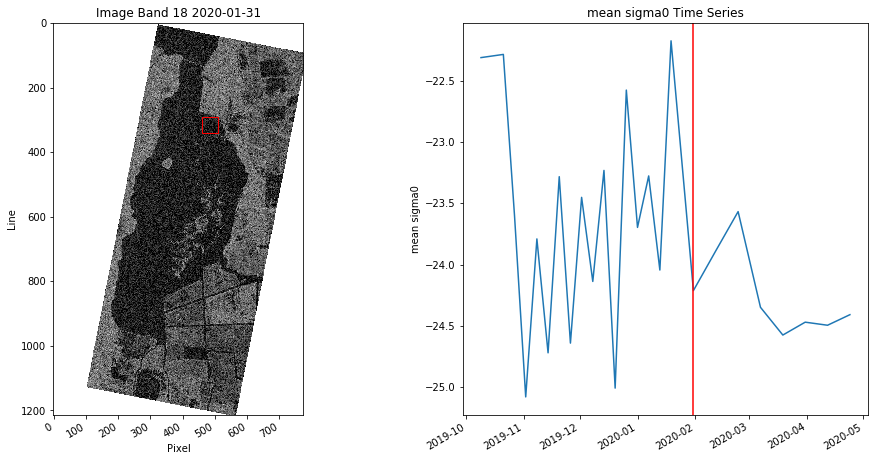

In [89]:
showImage(rasterstack_vv,tindex,bandnbr,subset)

C:\Users\vaak\Documents\Notebooks\.conda\envs\gdal2\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in log10


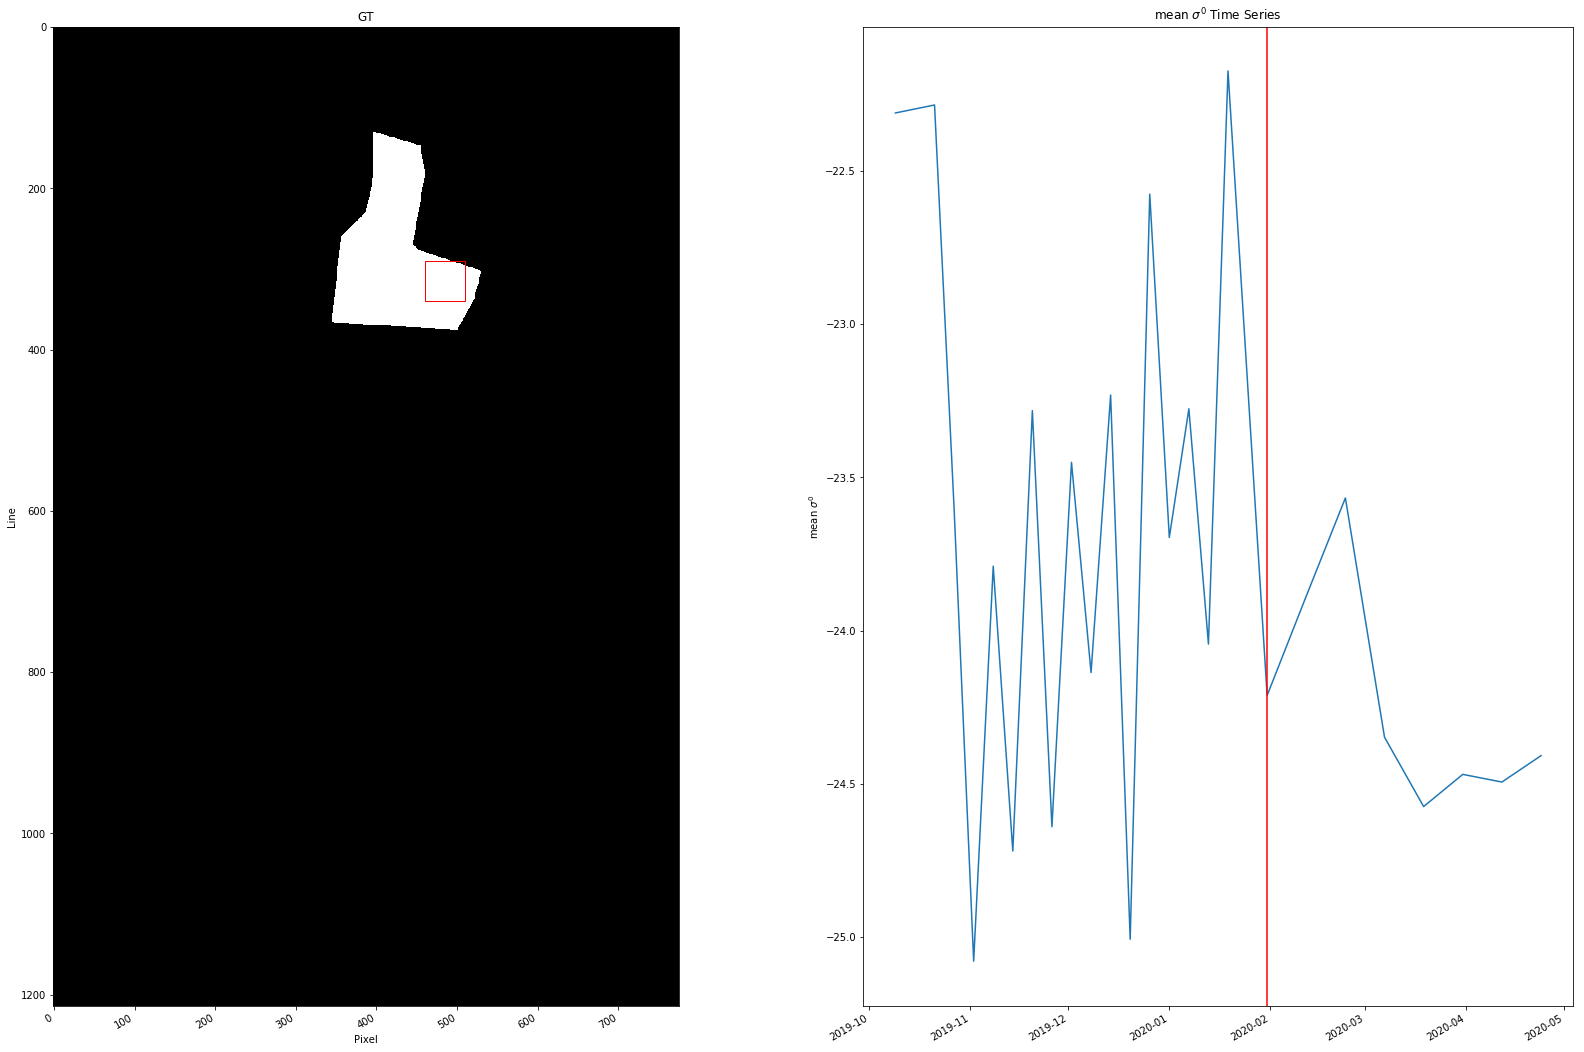

In [90]:
xmin_32VNL=geotrans[0]
ymax_32VNL=geotrans[3]
#x_utm=564683
#y_utm=6557352
#x0 = int((x_utm - xmin_32VNL) / 10)
#y0 = int((ymax_32VNL - y_utm) / 10)
#print(x0)
#print(y0)
#subset=[x0,y0,5,5]

showImageGT(rasterstack_vv,GT,tindex,bandnbr,subset)


In [91]:
def timeSeries(rasterstack,tindex,subset,ndv=0.):
    # Extract the means along the time series axes
    # raster shape is time steps, lines, pixels.
    # With axis=1,2, we average lines and pixels for each time
    # step (axis 0)
    raster=rasterstack.copy()
    if ndv != np.nan: raster[np.equal(raster,ndv)]=np.nan
    ts_pwr=np.nanmean(raster[:,subset[1]:(subset[1]+subset[3]),
    subset[0]:(subset[0]+subset[2])],axis=(1,2))
    # make the pandas time series object
    ts = pd.Series(ts_pwr,index=tindex)
    # return it
    return ts

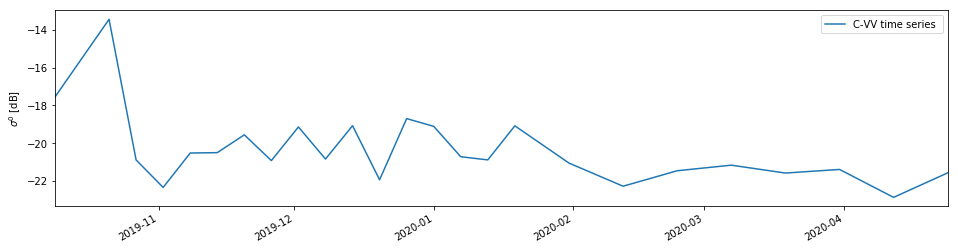

In [92]:

ts = timeSeries(rasterstack_vh,tindex,subset) #over subset
#ts = pd.Series(rs_means_vv,index=tindex) #over GT pixels


_=ts.plot(figsize=(16,4))
plt.ylabel('$\sigma^{0}$ [dB]')

_=plt.legend(['C-VV time series '])

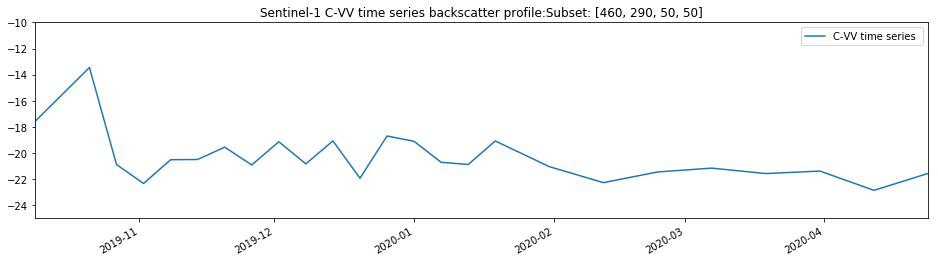

In [93]:
#ts = timeSeries(rasterstack_vv,tindex,subset)
tsdf = pd.DataFrame(ts,index=ts.index,columns=['sigma0'])
# Plot
ylim=(-25,-10)
tsdf.plot(figsize=(16,4))
plt.title('Sentinel-1 C-VV time series backscatter profile:Subset: {}'.format(subset))
plt.ylim(ylim)
_=plt.legend(['C-VV time series '])

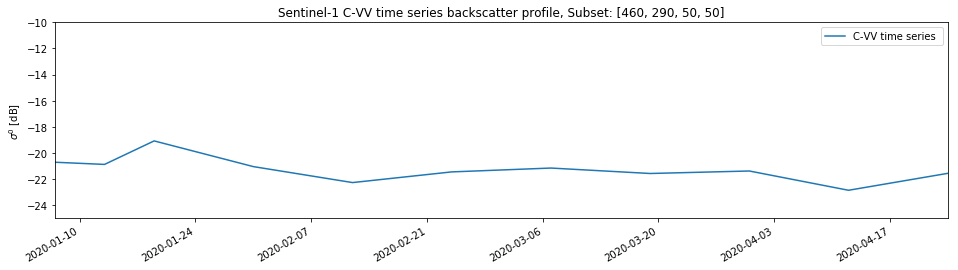

In [94]:
tsdf_sub1=tsdf[tsdf.index>'2020-01-01']
# Plot
tsdf_sub1.plot(figsize=(16,4))
plt.title('Sentinel-1 C-VV time series backscatter profile, Subset: {}'.format(subset))
_=plt.ylim(ylim)
plt.ylabel('$\sigma^{0}$ [dB]')
_=plt.legend(['C-VV time series '])

In [95]:
def showImageGT(rasterstack,GT,tindex,bandnbr,subset=None,vmin=None,vmax=None):
    #'''Input:
    #rasterstack stack of images in SAR power units
    #tindex time series date index
    #bandnbr bandnumber of the rasterstack to dissplay'''
    fig = plt.figure(figsize=(28,20))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    # If vmin or vmax are None we use percentiles as limits:
    ax1.imshow(GT,cmap='gray',vmin=vmin,vmax=vmax)
    ax1.set_title('GT')
    if subset== None:
        ydim,xdim=GT.shape
        subset=(xdim,ydim)
    ax1.add_patch(patches.Rectangle((subset[0],subset[1]),subset[2],subset[3],fill=False,edgecolor='red'))
    ax1.xaxis.set_label_text('Pixel')
    ax1.yaxis.set_label_text('Line')
    ts_pwr=np.mean(rasterstack[:,subset[1]:(subset[1]+subset[3]),subset[0]:(subset[0]+subset[2])],axis=(1,2))
    ts_dB=10.*np.log10(ts_pwr)
    ax2.plot(tindex,ts_pwr)
    ax2.yaxis.set_label_text('mean $\sigma^{0}$ ')
    ax2.set_title('mean $\sigma^{0}$ Time Series')
    # Add a vertical line for the date where the image is displayed
    ax2.axvline(tindex[bandnbr-1],color='red')
    fig.autofmt_xdate()

In [96]:
import pywt

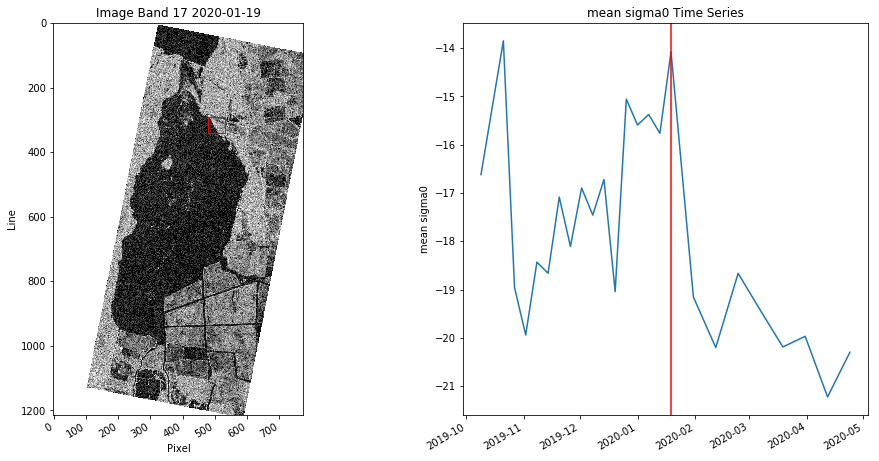

In [97]:
subset=[480,290,50,50]
bandnbr=17

showImage(rasterstack_vh,tindex,bandnbr,subset)

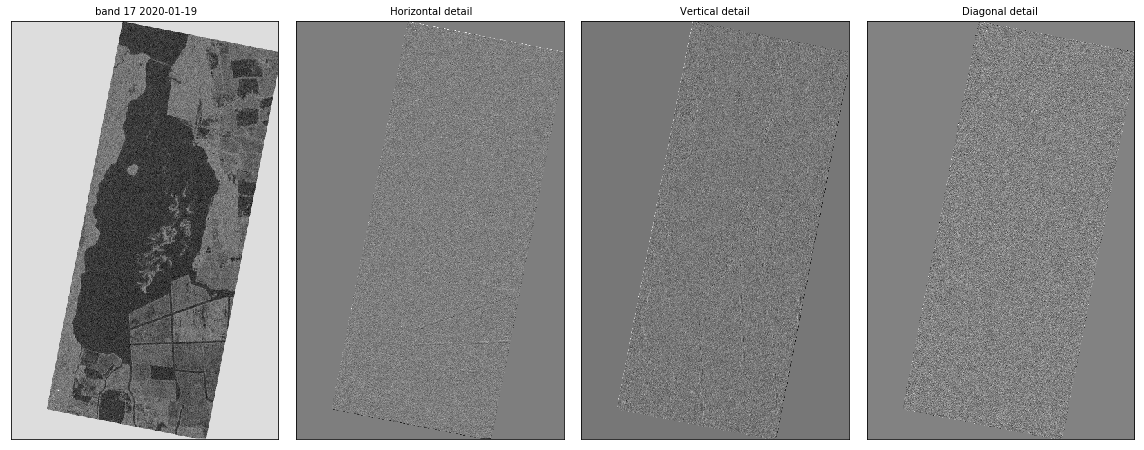

In [104]:

# Wavelet transform of image, and plot approximation and details
titles = [' band {} {}'.format(bandnbr,tindex[bandnbr-1].date()), ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
bandnbr=17
            
#coeffs2 = pywt.dwt2(rasterstack_vv[bandnbr,subset[1]:(subset[1]+subset[3]),subset[0]:(subset[0]+subset[2])], 'bior1.3')

coeffs2 = pywt.dwt2(rasterstack_vv[bandnbr,:,:], 'haar')
#coeffs2 = pywt.dwt2(original, 'sym12') 

LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(16, 8))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

    
    
fig.tight_layout()
plt.show()



In [106]:
LH.shape

(607L, 388L)

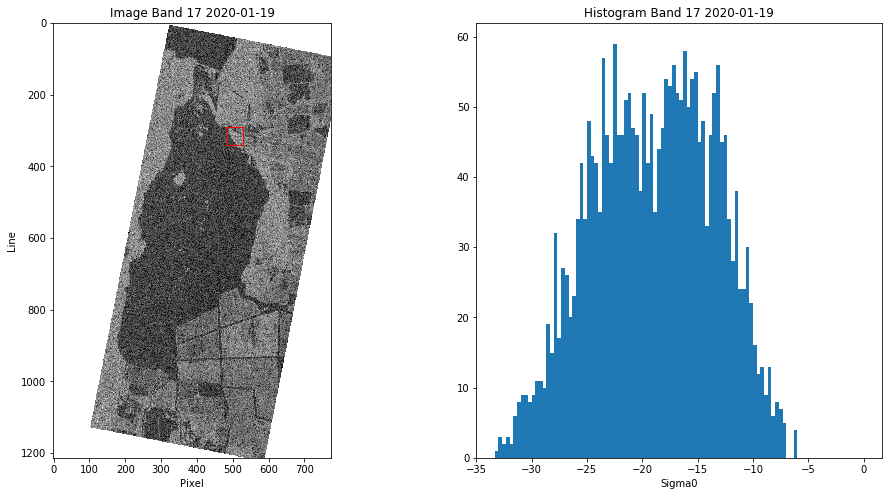

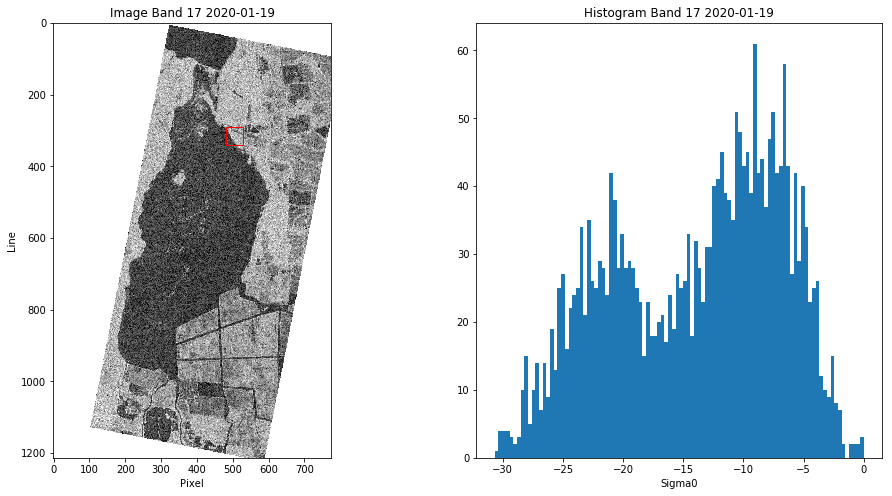

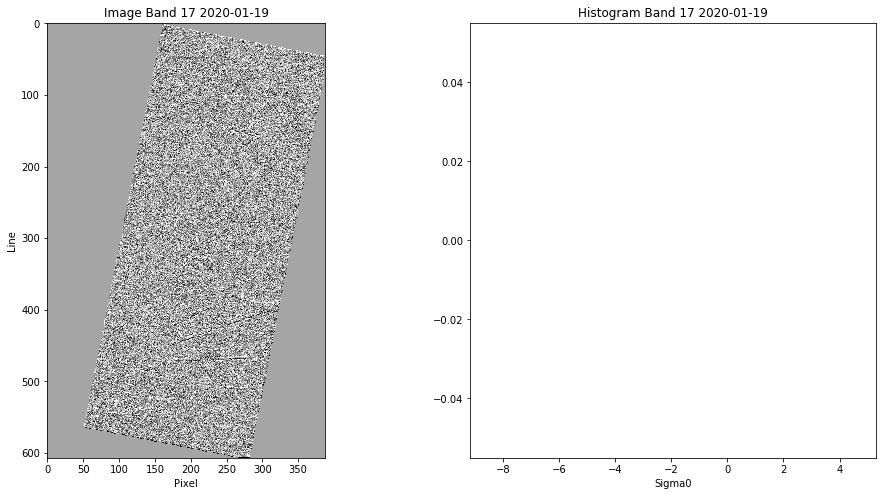

In [120]:
subset=[480,290,50,50]

# ENTER YOUR CODE HERE
vmin=np.percentile(rasterstack_vv.flatten(),0.5)
vmax=np.percentile(rasterstack_vv.flatten(),95)
showImagehist(rasterstack_vv,subset,tindex,bandnbr,vmin,vmax)
vmin=np.percentile(rasterstack_vh.flatten(),0.5)
vmax=np.percentile(rasterstack_vh.flatten(),95)
showImagehist(rasterstack_vh,subset,tindex,bandnbr,vmin,vmax)
vmin=np.percentile(LH.flatten(),0.5)
vmax=np.percentile(LH.flatten(),95)
showImagehist_sl(LH,subset,tindex,bandnbr,vmin,vmax)


In [123]:
subset

[480, 290, 50, 50]

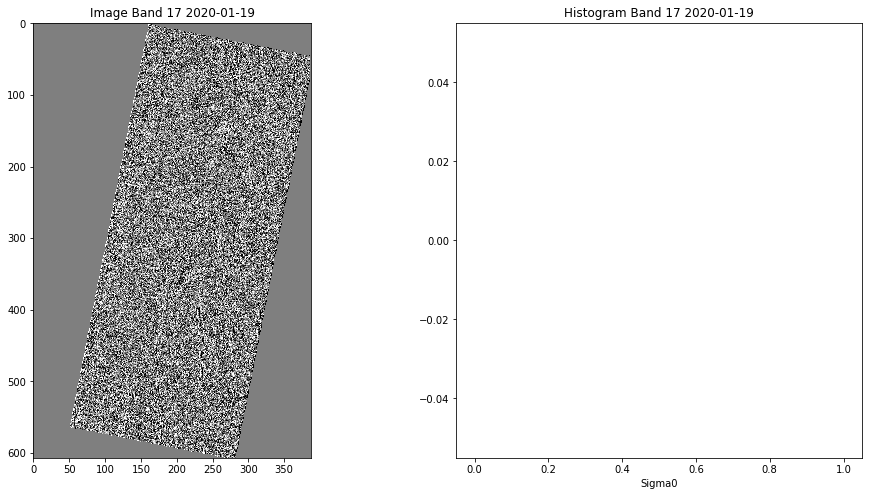

In [124]:
fig = plt.figure(figsize=(16,8)) # Initialize figure with a size
ax1 = fig.add_subplot(121) # 121 determines: 1 row, 2 plots, first plot
ax2 = fig.add_subplot(122) # 122 determines: 1 row, 2 plots, second plot
# First plot: Image
bandnbr=17
raster_subset=HL[subset[1]:subset[1]+subset[3],subset[0]:subset[0]+subset[2]]

vmin=np.percentile(HL.flatten(),5)
vmax=np.percentile(HL.flatten(),95)
ax1.imshow(HL,cmap='gray',vmin=vmin,vmax=vmax)
ax1.set_title('Image Band {} {}'.format(bandnbr,
tindex[bandnbr-1].date()))
# Second plot: Historgram
# IMPORTANT: To get a histogram, we first need to *flatten*
# the two-dimensional image into a one-dimensional vector.
h = ax2.hist(raster_subset.flatten(),bins=200)
ax2.xaxis.set_label_text('Sigma0')
_=ax2.set_title('Histogram Band {} {}'.format(bandnbr,
tindex[bandnbr-1].date()))

In [126]:
vmax

5.422226428985596

In [119]:
def showImagehist_sl(image,subset,tindex,bandnbr,vmin=None,vmax=None):
    fig = plt.figure(figsize=(16,8))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    ax1.imshow(image,cmap='gray',vmin=vmin,vmax=vmax)
    #ax1.imshow(raster,cmap='gray',vmin=vmin,vmax=vmax)
    ax1.set_title('Image Band {} {}'.format(bandnbr,
    tindex[bandnbr-1].date()))
    vmin=np.percentile(rasterstack,2) if vmin==None else vmin #change vmin & vmax to
    #change what values are displayed
    vmax=np.percentile(rasterstack,98) if vmax==None else vmax
    ax1.xaxis.set_label_text('Linear stretch Min={} Max={}'.format(vmin,vmax))
    raster_subset=image[subset[1]:subset[1]+subset[3],subset[0]:subset[0]+subset[2]]
    ax1.add_patch(patches.Rectangle((subset[0],subset[1]),subset[2],subset[3],fill=False,edgecolor='red'))
    ax1.xaxis.set_label_text('Pixel')
    ax1.yaxis.set_label_text('Line')
    h = ax2.hist(raster_subset.flatten(),bins=100,range=(vmin,vmax))
    ax2.xaxis.set_label_text('Sigma0')
    ax2.set_title('Histogram Band {} {}'.format(bandnbr,
    tindex[bandnbr-1].date()))